## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [2]:
# import libraries to use
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

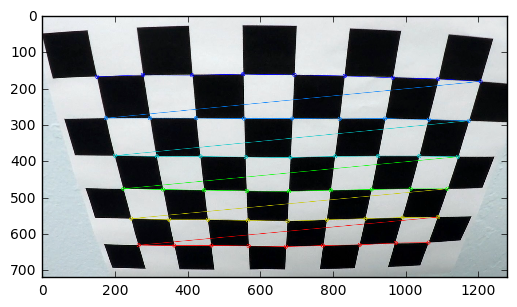

In [67]:
# Let's check how one of the calibration images look like
image = cv2.imread('./camera_cal/calibration2.jpg')
# in some images not all intersection points are visible

# Intersection point capturing
nx = 9
ny = 6
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
# Plot corner to verify
cv2.drawChessboardCorners(image, (nx, ny), corners, ret)

plt.imshow(image)

In [70]:
# Calculate camera matrix and distortion coeficient
# points array is always the same because we will discard images with less than nx y ny intersection points
# numpy array to hold real word coord. of points. Each coord is 3d with z=0
objp = np.zeros((nx * ny, 3), np.float32)
# reshape the data into a grid which is what opencv calibrateCamera needs
# done differently that in template for learning purpose
x_coord, y_coord = np.mgrid[0:nx,0:ny]
x_coord = x_coord.flatten(order='F')
y_coord = y_coord.flatten(order='F')
objp[:,0] = x_coord
objp[:,1] = y_coord
# Since opencv calibrateCamera takes an array of arrays of points (one array for image) we need to set a list
# Each element on that list is the array of points of an image
objpoints = [] # 3d points in real world space
# A structure repeating this patter but with point in the image plane is also needed for calibrateCamera
imgpoints = [] # 2d points in image plane.

# List of calibration images available
images = glob.glob('./camera_cal/calibration*.jpg')

# Loop images and add points in those where findChessBoardCorners is succeful
for image in images:
    img = cv2.imread(image)
    # Repeat steps done for a single image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    # Check that corners have been found. From a previous check we know some calibration images will not work
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

# Get calibration values for the camera
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print('Camera Matrix:')
print(mtx)
print('Distortion Coefficients:')
print(dist)

Camera Matrix:
[[  1.15396093e+03   0.00000000e+00   6.69705375e+02]
 [  0.00000000e+00   1.14802496e+03   3.85656224e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
Distortion Coefficients:
[[ -2.41017944e-01  -5.30722012e-02  -1.15810358e-03  -1.28318397e-04
    2.67126914e-02]]


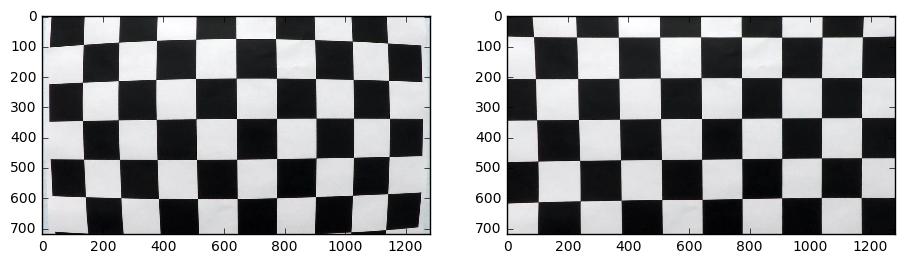

In [84]:
# Lets check those results on a calibration image first
image = cv2.imread('./camera_cal/calibration1.jpg')
dst = cv2.undistort(image, mtx, dist, None, mtx)
fig, ax = plt.subplots(1,2)
ax[0].imshow(image)
ax[1].imshow(dst)
fig.set_size_inches(11,4)

## And so on and so forth...